LAB 1

AIDI 2000

Group Members
- Preyaskumar Jayswal
- Zaina Firosh Kamal
- Declan Trevor Kintu

Import Libraries

In [1165]:
import pandas as pd
import numpy as np
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras import layers, Sequential
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

Import Dataset

In [1166]:
data = pd.read_csv('spotify_data_12_20_2023.csv', dtype="object")
data.dropna(inplace=True)
print(data.columns)

Index(['album_id', 'album_name', 'album_popularity', 'album_type', 'artists',
       'artist_0', 'artist_1', 'artist_2', 'artist_3', 'artist_4', 'artist_id',
       'duration_sec', 'label', 'release_date', 'total_tracks', 'track_id',
       'track_name', 'track_number', 'artist_genres', 'artist_popularity',
       'followers', 'name', 'genre_0', 'genre_1', 'genre_2', 'genre_3',
       'genre_4', 'acousticness', 'analysis_url', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'type', 'uri', 'valence', 'explicit', 'track_popularity',
       'release_year', 'release_month', 'rn'],
      dtype='object')


Describe Dataset

In [1167]:
print(data.describe())

                      album_id                album_name album_popularity  \
count                      583                       583              583   
unique                     181                       156               71   
top     6Mzrj457wfDueNk3eZJ3Z8  Handel: St. John Passion                6   
freq                        39                        39               40   

       album_type                                            artists  \
count         583                                                583   
unique          2                                                348   
top         album  ['George Frideric Handel', 'Martin Kleitmann',...   
freq          460                                                 39   

                      artist_0                                artist_1  \
count                      583                                     583   
unique                     107                                     183   
top     George Frideric Handel 

Plot Graphs

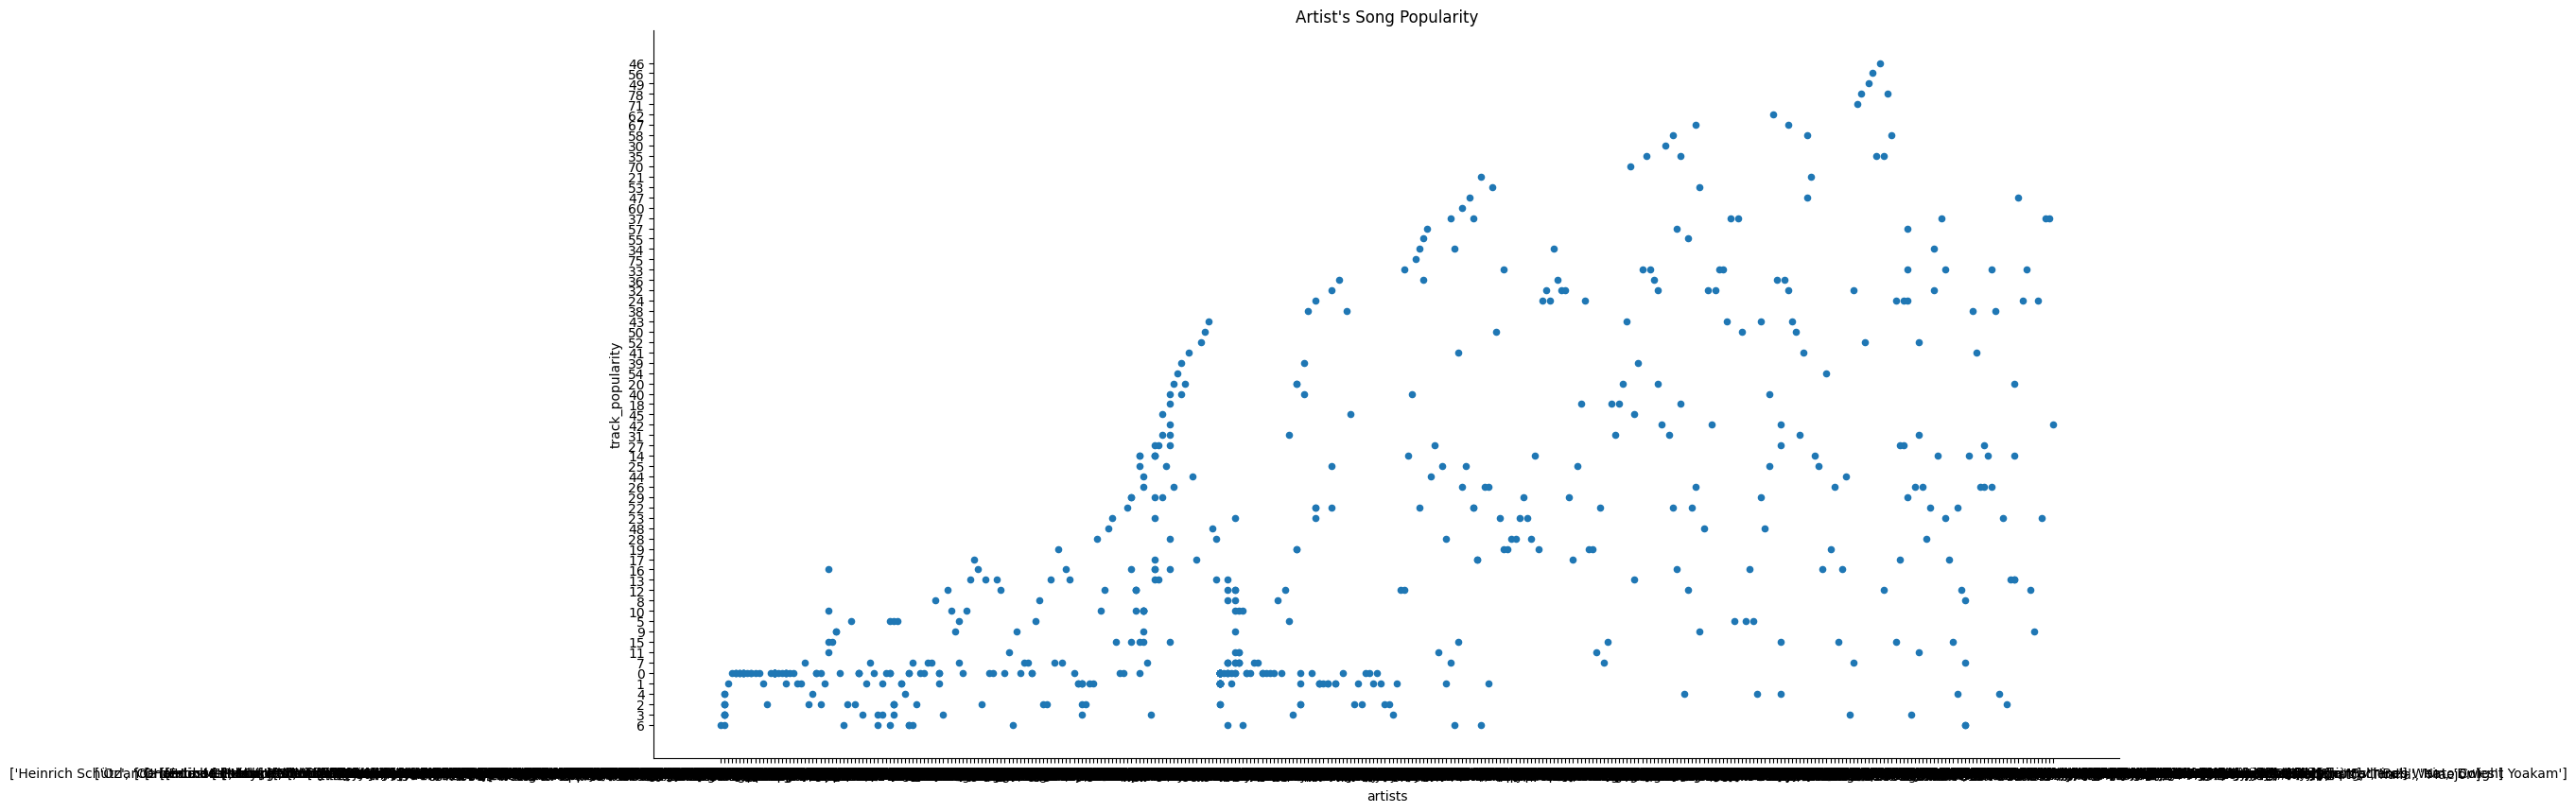

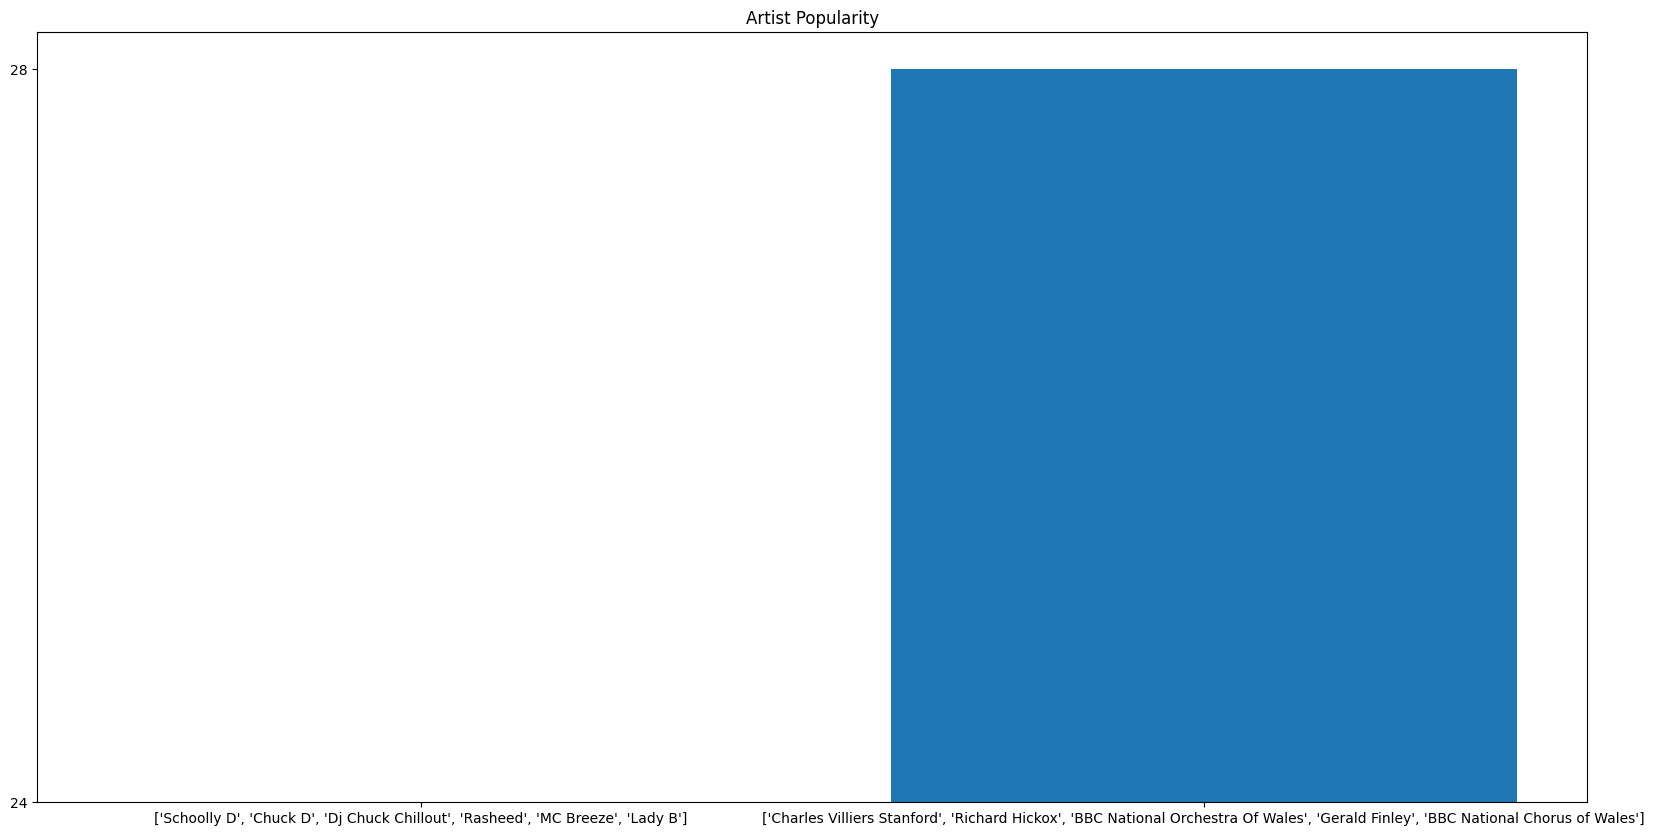

In [1168]:
df = pd.DataFrame(data)

df.plot(kind='scatter', x='artists', y='track_popularity', figsize=(20, 10), 
        title="Artist's Song Popularity")
plt.gca().spines[['top', 'right']].set_visible(False)

x1 = df['artists']
y1 = df['artist_popularity']
plt.figure(figsize =(20, 10))
plt.bar(x1[0:10], y1[0:10])
plt.title('Artist Popularity')
plt.show()

Select Fields for data processing

In [1169]:
numeric_features = ['artist_popularity','acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 
                    'loudness', 'speechiness', 'tempo', 'track_popularity', 'followers', 'album_popularity', 
                    'instrumentalness']
categorical_features = ['artists','label','artist_genres'] 

X_categorical = df[categorical_features]
X_numeric = df[numeric_features]

Prepare the Data for Processing

In [1170]:
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

label_encoders = {}
X_categorical_encoded = pd.DataFrame()

for feature in categorical_features:
    label_encoder = LabelEncoder()
    X_categorical_encoded[feature] = label_encoder.fit_transform(df[feature])
    label_encoders[feature] = label_encoder

Split the data

In [1171]:
X = pd.concat([pd.DataFrame(X_numeric_scaled, columns=numeric_features), X_categorical_encoded], axis=1)
y = df['artist_popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Analyse Model Shape

In [1172]:
# View the Model Shape
print(X_train.shape)
print(y_train.shape)

(466, 16)
(466,)


In [1173]:
print(X_test.shape)
print(y_test.shape)

(117, 16)
(117,)


Reshape the data

In [1174]:
X_train = X_train.to_numpy().reshape(-1, 16, 1)
X_test = X_test.to_numpy().reshape(-1, 16, 1)

# Preprocess y_test data
y_test = y_test.to_numpy().reshape(-1, 1)  # Reshape to a column vector
placeholder_features_test = np.zeros((len(y_test), 3))  # Create placeholder features
y_test_categorical = keras.utils.to_categorical(y_test)
y_test = np.concatenate((y_test_categorical, placeholder_features_test), axis=1)  # Concatenate features
y_test = y_test.flatten()  # Flatten back to a 1D array if necessary

y_train = keras.utils.to_categorical(y_train)
y_test = np.concatenate((y_test_categorical, placeholder_features_test), axis=1)  # Concatenate features

Analyse Model Shape

In [1175]:
# View the Model Shape
print(X_train.shape)
print(y_train.shape)

(466, 16, 1)
(466, 89)


In [1176]:
print(X_test.shape)
print(y_test.shape)

(117, 16, 1)
(117, 89)


Build and execute the model.

In [1177]:
# Defining the model
model = Sequential([
	layers.Input(shape=(16, 1)), 
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(32, kernel_size=3, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(y_test.shape[1], activation='softmax')
])


# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# fitting the model
h = model.fit(X_train, y_train, epochs=300, verbose=1, validation_data=(X_test, y_test), batch_size=8)


Epoch 1/300


59/59 [==============================] - 2s 7ms/step - loss: 4.0688 - accuracy: 0.1288 - val_loss: 3.2983 - val_accuracy: 0.2051
Epoch 2/300
59/59 [==============================] - 0s 3ms/step - loss: 3.0851 - accuracy: 0.2189 - val_loss: 2.6972 - val_accuracy: 0.3846
Epoch 3/300
59/59 [==============================] - 0s 3ms/step - loss: 2.5378 - accuracy: 0.3820 - val_loss: 2.3969 - val_accuracy: 0.4359
Epoch 4/300
59/59 [==============================] - 0s 3ms/step - loss: 2.2103 - accuracy: 0.4163 - val_loss: 2.0498 - val_accuracy: 0.5128
Epoch 5/300
59/59 [==============================] - 0s 3ms/step - loss: 1.9167 - accuracy: 0.4785 - val_loss: 1.7567 - val_accuracy: 0.5556
Epoch 6/300
59/59 [==============================] - 0s 2ms/step - loss: 1.6094 - accuracy: 0.5365 - val_loss: 1.5064 - val_accuracy: 0.5983
Epoch 7/300
59/59 [==============================] - 0s 3ms/step - loss: 1.4202 - accuracy: 0.5880 - val_loss: 1.3573 - val_accuracy: 0.6496
Epoch 8/300
59/59 [======

In [1178]:
model.summary()

Model: "sequential_69"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_109 (Conv1D)         (None, 14, 32)            128       
                                                                 
 dense_286 (Dense)           (None, 14, 32)            1056      
                                                                 
 max_pooling1d_77 (MaxPooli  (None, 7, 32)             0         
 ng1D)                                                           
                                                                 
 conv1d_110 (Conv1D)         (None, 5, 32)             3104      
                                                                 
 dense_287 (Dense)           (None, 5, 32)             1056      
                                                                 
 flatten_71 (Flatten)        (None, 160)               0         
                                                     

Evaluate the model

In [1179]:
score=model.evaluate(X_test, y_test)
print("Test loss:",score[0])
print("Test accuracy",score[1])

1/4 [======>.......................] - ETA: 0s - loss: 0.2138 - accuracy: 0.9375

4/4 [==============================] - 0s 4ms/step - loss: 0.9179 - accuracy: 0.9487
Test loss: 0.9179329872131348
Test accuracy 0.9487179517745972


Plot the model performance

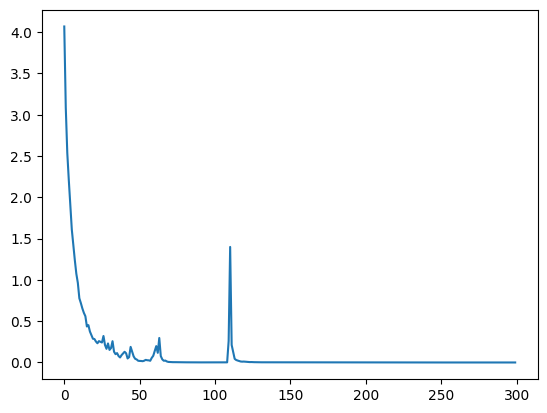

In [1180]:
plt.plot(h.history['loss'])

Make Prediction

In [1181]:
result = model.predict(X_test[:7])

1/1 [==============================] - 0s 180ms/step


Compare Prediction against test value

In [1182]:
result[:7].argmax(axis=1)

array([66, 80, 38, 73, 65, 66, 38], dtype=int64)

In [1183]:
y_test[:7].argmax(axis=1)

array([66, 73, 38, 73, 65, 66, 38], dtype=int64)

In [1184]:
result

array([[1.89866194e-29, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.69825823e-35, 7.81600583e-28, 1.93848942e-29, 4.45189004e-31,
        1.10324277e-35, 8.11767999e-31, 1.61683253e-32, 1.23624127e-30,
        0.00000000e+00, 1.05047862e-36, 0.00000000e+00, 1.10588053e-35,
        1.89874048e-30, 8.48238836e-34, 8.78467429e-31, 2.46712809e-37,
        1.21756200e-31, 1.08824546e-35, 5.97217307e-37, 0.00000000e+00,
        1.45048533e-26, 1.11941866e-30, 0.00000000e+00, 0.00000000e+00,
        2.39625993e-32, 8.38856701e-24, 2.27189861e-36, 4.21633749e-21,
        6.61542093e-34, 0.00000000e+00, 1.15919161e-35, 1.38811175e-35,
        8.99209226e-19, 0.00000000e+00, 6.37342662e-20, 3.31173346e-32,
        1.82945727e-32, 0.00000000e+00, 0.00000000e+00, 1.99557907e-23,
        0.00000000e+00, 1.08655881e-17, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.34141092e-20, 0.00000000e+00, 0.00000000e+00,
        1.14390535e-19, 0.00000000e+00, 3.09835960e-36, 4.712941

In [1185]:
y_test[:7]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0.